In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("survey_data.csv")
data_test1 = data
data_test2 = data
data_test3 = data

In [2]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             554 non-null    int64
 1   Age(Yrs.)          554 non-null    int64
 2   Marital_Status     554 non-null    int64
 3   Father             554 non-null    int64
 4   Mother             554 non-null    int64
 5   Grand_Father       554 non-null    int64
 6   Grand_Mother       554 non-null    int64
 7   Siblings           554 non-null    int64
 8   Pregnant           554 non-null    int64
 9   Radiation          554 non-null    int64
 10  Hairline_Pattern   554 non-null    int64
 11  Hairstyle          554 non-null    int64
 12  Density            554 non-null    int64
 13  Hair_Fall_Rate     554 non-null    int64
 14  Scalp_Infection    554 non-null    int64
 15  Pain_Itch          554 non-null    int64
 16  Nutrition          554 non-null    int64
 17  Weight_Loss     

,Gender,Age(Yrs.),Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Radiation,...,Hair_Fall_Rate,Scalp_Infection,Pain_Itch,Nutrition,Weight_Loss,Sleeping_Pattern,Chemical_Products,Medication,Region,Label
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,0.454874,33.660650,0.422383,0.384477,0.259928,0.306859,0.185921,0.312274,0.012635,0.167870,...,121.095668,0.241877,0.326715,1.236462,0.261733,1.196751,0.357401,263.602888,123.703971,0.539711
std,0.668825,19.192289,0.494385,0.486911,0.438991,0.461607,0.389394,0.463840,0.111796,0.374089,...,117.690094,0.428607,0.469436,0.755957,0.439975,0.731065,0.479667,1983.242849,5.330226,0.498871
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,124.000000,0.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,89.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,124.000000,1.000000
75%,1.000000,45.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,200.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,7.000000,124.000000,1.000000
max,2.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1000.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,34567.000000,124.000000,1.000000


In [3]:
data_test1.head()

,Gender,Age(Yrs.),Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Radiation,...,Hair_Fall_Rate,Scalp_Infection,Pain_Itch,Nutrition,Weight_Loss,Sleeping_Pattern,Chemical_Products,Medication,Region,Label
0,0,20,0,0,0,0,0,0,0,1,...,4,0,1,1,0,2,1,0,124,1
1,2,41,0,0,0,0,0,0,0,0,...,63,0,0,2,0,2,1,0,124,0
2,1,50,1,0,0,0,0,0,0,0,...,158,0,0,2,0,2,1,27,124,1
3,2,42,0,1,0,0,0,0,0,0,...,362,0,0,2,0,1,1,0,124,1
4,1,33,1,0,0,0,0,0,0,0,...,58,0,0,2,0,2,1,147,124,0


In [4]:
x = data.drop(['Label'], axis = 'columns')
y = data['Label']

x_array = x.to_numpy()

In [5]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter= 10000, activation='relu',solver='adam')
mlp

MLPClassifier(max_iter=10000)

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler

kf = KFold(n_splits=10, shuffle=True, random_state=42) # choose the number of folds and random state

accuracy_scores = []
train_accuracy_scores = []
f1_scores = []
recall_scores = []
mcc_scores = []

for train_index, test_index in kf.split(x_array,y):
    X_train, X_test = x_array[train_index], x_array[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy=accuracy_score(y_train,mlp.predict(X_train))
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    train_accuracy_scores.append(train_accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    mcc_scores.append(mcc)

    print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Recall: {recall:.2f}, MCC: {mcc:.2f}")

# Step 5: Evaluate the Model
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_f1 = sum(f1_scores) / len(f1_scores)
mean_recall = sum(recall_scores) / len(recall_scores)
mean_mcc = sum(mcc_scores) / len(mcc_scores)

print(f"Mean Accuracy: {mean_accuracy:.2f}, Mean F1 Score: {mean_f1:.2f}, Mean Recall: {mean_recall:.2f}, Mean MCC: {mean_mcc:.2f}")

Accuracy: 0.82, F1 Score: 0.81, Recall: 0.81, MCC: 0.63
Accuracy: 0.88, F1 Score: 0.87, Recall: 0.88, MCC: 0.75
Accuracy: 0.88, F1 Score: 0.87, Recall: 0.88, MCC: 0.75
Accuracy: 0.80, F1 Score: 0.80, Recall: 0.80, MCC: 0.61
Accuracy: 0.85, F1 Score: 0.84, Recall: 0.84, MCC: 0.69
Accuracy: 0.96, F1 Score: 0.96, Recall: 0.96, MCC: 0.93
Accuracy: 0.76, F1 Score: 0.76, Recall: 0.77, MCC: 0.53
Accuracy: 0.96, F1 Score: 0.96, Recall: 0.96, MCC: 0.93
Accuracy: 0.89, F1 Score: 0.89, Recall: 0.89, MCC: 0.78
Accuracy: 0.82, F1 Score: 0.82, Recall: 0.82, MCC: 0.64
Mean Accuracy: 0.86, Mean F1 Score: 0.86, Mean Recall: 0.86, Mean MCC: 0.72


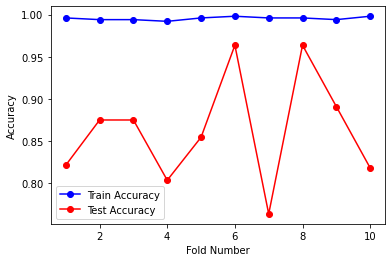

In [8]:
import matplotlib.pyplot as plt
k=10
plt.plot(range(1, k+1), train_accuracy_scores, 'b-o', label='Train Accuracy')
plt.plot(range(1, k+1), accuracy_scores, 'r-o',label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(443, 22)
(111, 22)


In [29]:
#from sklearn.preprocessing import StandardScaler

#scaler= StandardScaler()
#data = scaler.fit_transform(data)

In [30]:
#data = pd.DataFrame(data,columns = ['Gender','Age(Yrs.)','Marital_Status','Father','Mother','Grand_Father','Grand_Mother','Siblings','Pregnant','Radiation','Hairline_Pattern','Hairstyle','Density','Hair_Fall_Rate','Scalp_Infection','Pain_Itch','Nutrition','Weight_Loss','Sleeping_Pattern','Chemical_Products','Medication','Region','Label'])
#data.head()

In [31]:
#data.shape
#data.head()
#data.describe()

In [50]:

#from sklearn import svm

In [51]:
#mlp = svm.SVC(kernel='rbf',C=1,random_state = 42)


MLPClassifier(max_iter=10000)

In [52]:
mlp.fit(x_train,y_train)

MLPClassifier(max_iter=10000)

In [53]:
pred = mlp.predict(x_test)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[42, 10],
       [ 3, 56]], dtype=int64)

In [55]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.93      0.81      0.87        52
           1       0.85      0.95      0.90        59

    accuracy                           0.88       111
   macro avg       0.89      0.88      0.88       111
weighted avg       0.89      0.88      0.88       111



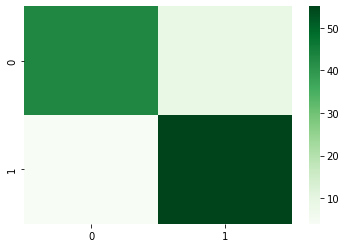

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap='Greens')
plt.show()

#sns.pairplot(data,hue='Label')
#plt.show()
#data_test1.columns

In [39]:
data_test1 = data_test1[[ 'Age(Yrs.)', 'Marital_Status',
 'Pregnant', 'Radiation','Scalp_Infection','Pain_Itch','Nutrition','Weight_Loss','Chemical_Products',
       'Sleeping_Pattern','Medication','Label']]
data_test2 = data_test2[['Father','Mother','Grand_Father','Grand_Mother','Siblings','Label']]
data_test3 = data_test3[['Hair_Fall_Rate','Hairline_Pattern','Hairstyle','Density','Label']]

In [120]:
plt.figure(figsize=(16,15))
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm')

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 1152x1080 with 0 Axes>

<AxesSubplot:>

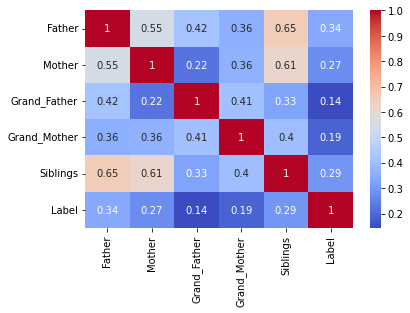

In [157]:
plt.figure()
sns.heatmap(data_test2.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

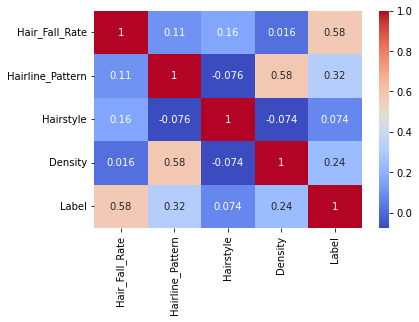

In [158]:
plt.figure()
sns.heatmap(data_test3.corr(), annot=True, cmap='coolwarm')

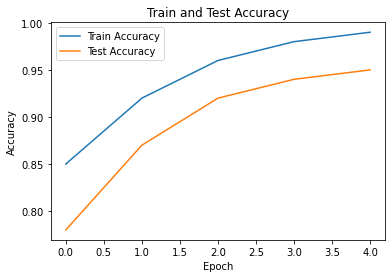

In [86]:
import matplotlib.pyplot as plt

# assuming you have train accuracy and test accuracy stored in separate lists or arrays
train_acc = [0.85, 0.92, 0.96, 0.98, 0.99]
test_acc = [0.78, 0.87, 0.92, 0.94, 0.95]

# plot the train accuracy and test accuracy
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')

# add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')

# add legend
plt.legend()

# display the plot
plt.show()
